In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from statsmodels.tsa.arima.model import ARIMA
df=pd.read_csv('/content/GlobalWeatherRepository.csv')

In [ ]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4068 entries, 0 to 4067
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       4068 non-null   object 
 1   location_name                 4068 non-null   object 
 2   latitude                      4068 non-null   float64
 3   longitude                     4068 non-null   float64
 4   timezone                      4068 non-null   object 
 5   last_updated_epoch            4068 non-null   int64  
 6   last_updated                  4068 non-null   object 
 7   temperature_celsius           4067 non-null   float64
 8   temperature_fahrenheit        4067 non-null   float64
 9   condition_text                4067 non-null   object 
 10  wind_mph                      4067 non-null   float64
 11  wind_kph                      4067 non-null   float64
 12  wind_degree                   4067 non-null   float64
 13  win

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1.0,1.0,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55.0
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1.0,1.0,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55.0
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1.0,1.0,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55.0
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1.0,1.0,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55.0
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5.0,10.0,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55.0


In [ ]:
#data cleaning and preprocessing
df.isnull().sum()
df.drop_duplicates(inplace=True)

columns_to_drop = ["temperature_fahrenheit", "wind_mph", "pressure_in", "precip_in", "feels_like_fahrenheit","visibility_miles", "gust_mph"]
df_cleaned = df.drop(columns=columns_to_drop)

df_cleaned["last_updated"] = pd.to_datetime(df_cleaned["last_updated"],format='%Y-%m-%d %H:%M',errors='coerce')
df_cleaned.set_index("last_updated", inplace=True)

time_columns = ["sunrise", "sunset", "moonrise", "moonset"]
for col in time_columns:
    df_cleaned[col] = pd.to_datetime(df_cleaned[col], format="%I:%M %p", errors="coerce").dt.time

for col in df.columns:
  if df[col].dtype=='object':
    df[col].fillna(df[col].mode(),inplace=True)
  else:
    df[col].fillna(method='ffill',inplace=True)
    df[col].fillna(method='bfill',inplace=True)

def outliers(df, threshold=3):
  numeric_df=df.select_dtypes(include=[np.number])
  z_score= np.abs((numeric_df-numeric_df.mean())/numeric_df.std())
  new_df=df[(z_score<threshold).all(axis=1)]
  return new_df
df=outliers(df)

for col in df.select_dtypes(include=['object']).columns:
  print(f"unique values {col}):",df[col].unique())

df_cleaned.columns = df_cleaned.columns.str.lower().str.replace(" ", "_")





unique values country): ['Afghanistan' 'Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina'
 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Madagascar' 'Cape Verde' 'Cambodia' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo' 'Costa Rica'
 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Democratic Republic of Congo'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Swaziland'
 'Ethiopia' 'Fiji Islands' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Vatican City' 'Honduras' 'Hungary' 'Iceland' 'India' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kiribati' 'Kuwait' 'Kyrghyzstan' 'Indonesia' 'Latvia' 'Leb

<ipython-input-7-a2b2f8940a89>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode(),inplace=True)
<ipython-input-7-a2b2f8940a89>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

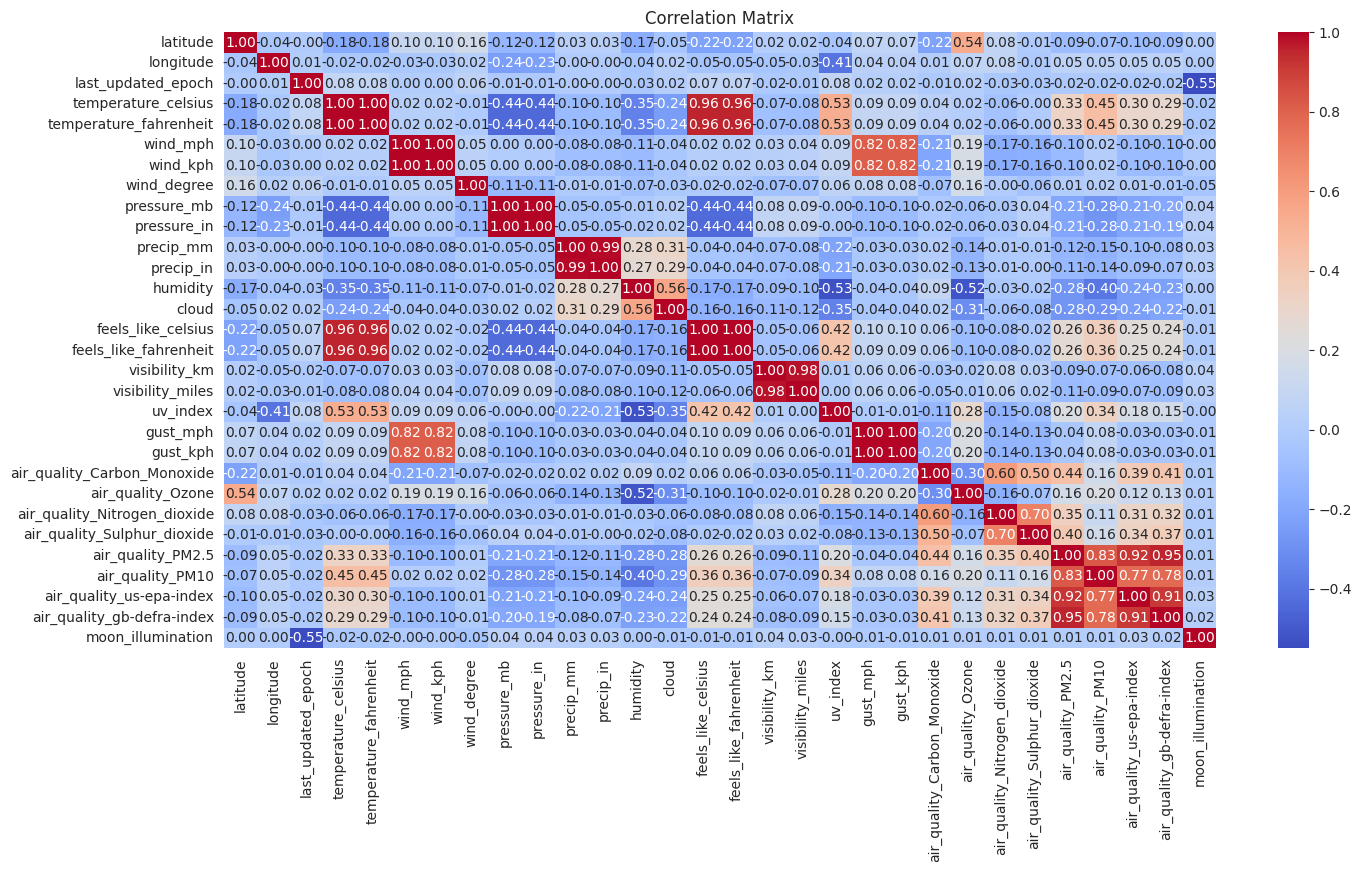

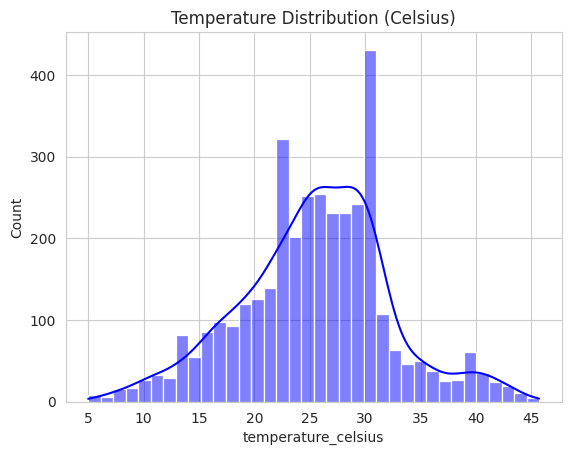

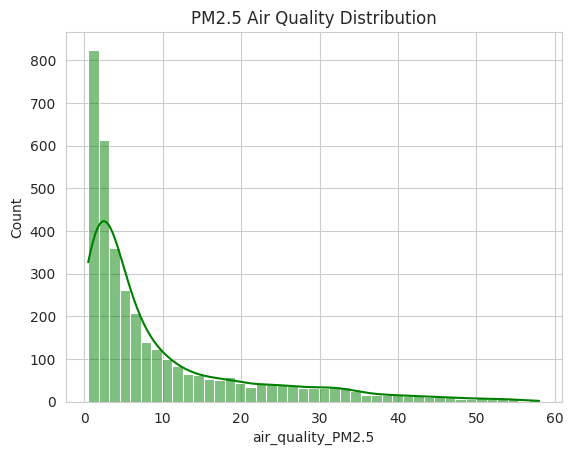

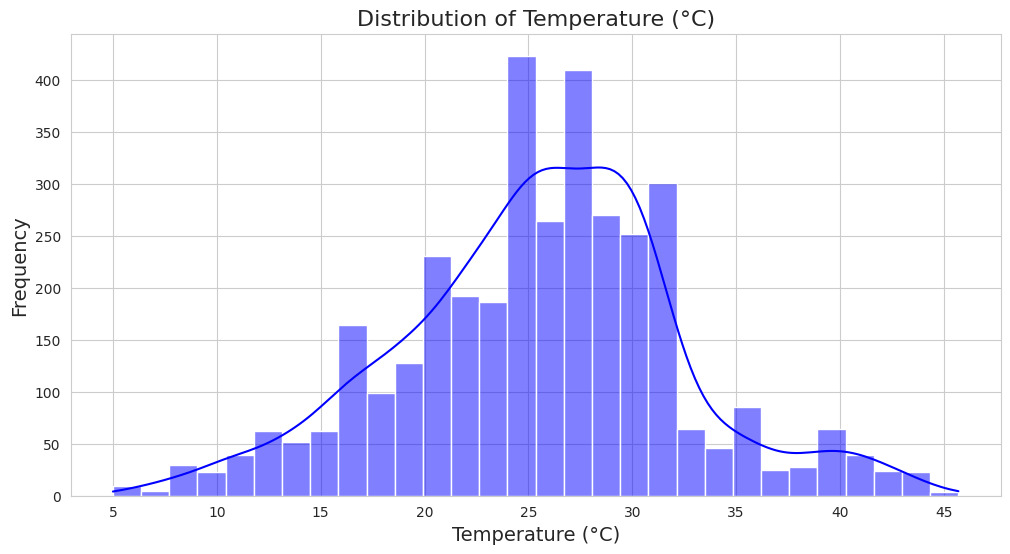

<ipython-input-8-e169033a128e>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['country'].isin(top_countries)],


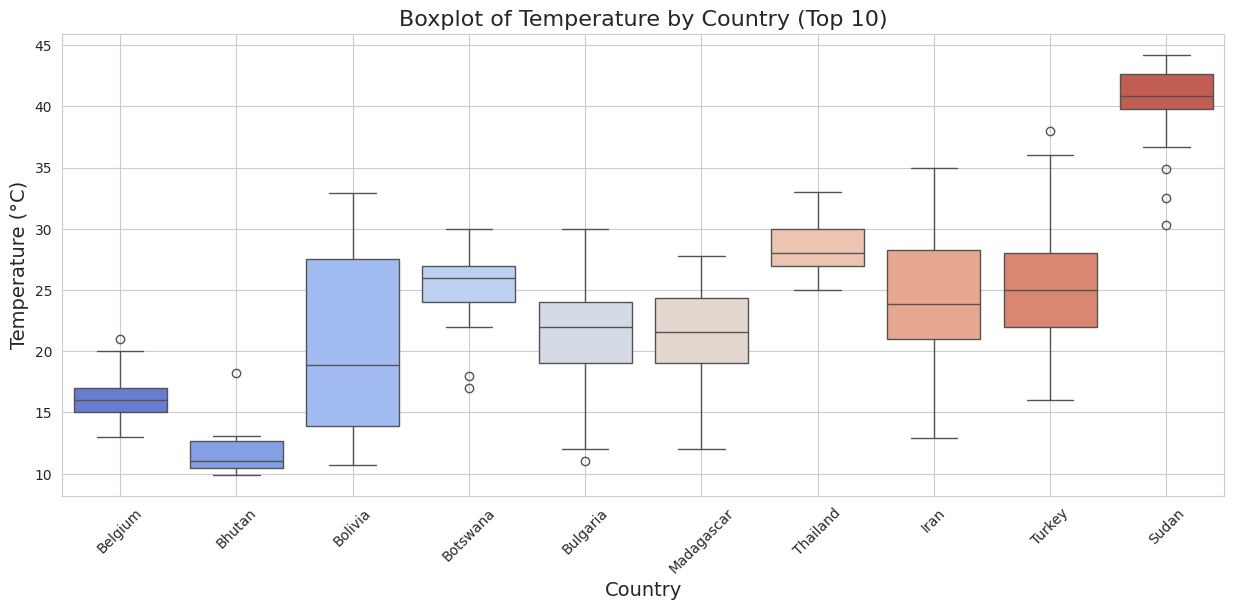

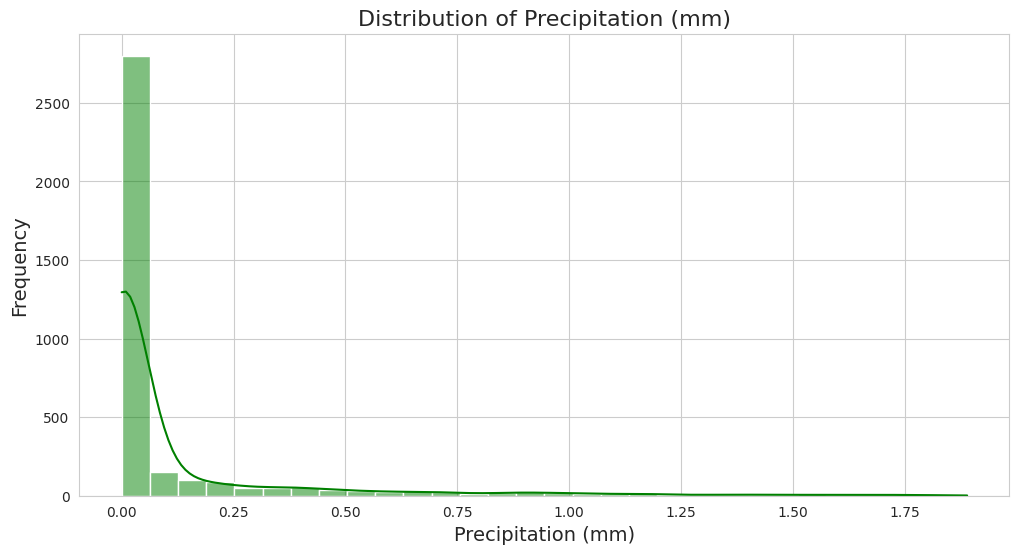

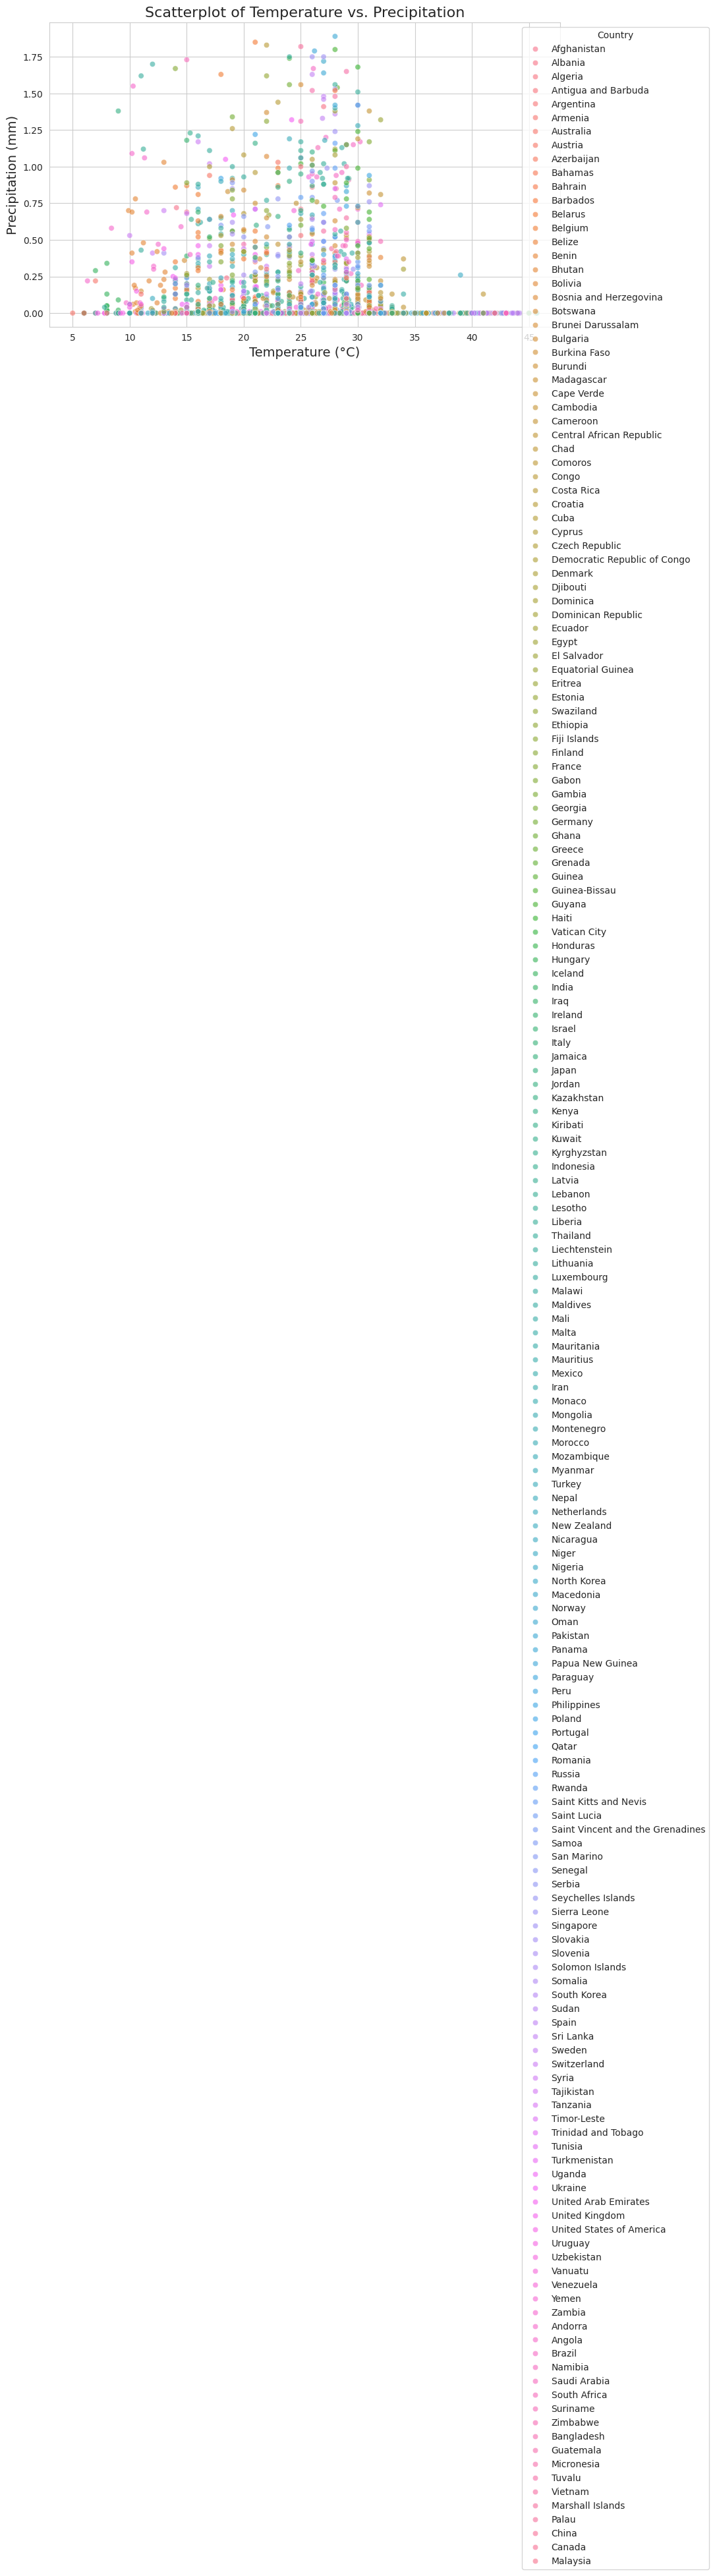

In [ ]:
# Exploratory Data Analysis (EDA)
sns.set_style("whitegrid")

numeric_data = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

sns.histplot(df['temperature_celsius'], kde=True, color='blue')
plt.title("Temperature Distribution (Celsius)")
plt.show()

sns.histplot(df['air_quality_PM2.5'], kde=True, color='green')
plt.title("PM2.5 Air Quality Distribution")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['temperature_celsius'], kde=True, bins=30, color='blue')
plt.title('Distribution of Temperature (°C)', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

# Visualization 2: Boxplot of Temperature by Country
plt.figure(figsize=(15, 6))
top_countries = df['country'].value_counts().index[:10]  # Top 10 countries
sns.boxplot(data=df[df['country'].isin(top_countries)],
            x='country', y='temperature_celsius', palette='coolwarm')
plt.title('Boxplot of Temperature by Country (Top 10)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Visualization 3: Distribution of Precipitation
plt.figure(figsize=(12, 6))
sns.histplot(df['precip_mm'], kde=True, bins=30, color='green')
plt.title('Distribution of Precipitation (mm)', fontsize=16)
plt.xlabel('Precipitation (mm)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

# Visualization 4: Scatterplot of Temperature vs. Precipitation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temperature_celsius', y='precip_mm', hue='country', alpha=0.6)
plt.title('Scatterplot of Temperature vs. Precipitation', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), title='Country')
plt.grid(True)
plt.show()


<ipython-input-26-2f43281dfb56>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='last_updated', y='temperature_celsius', palette={1:'blue', -1:'red'})


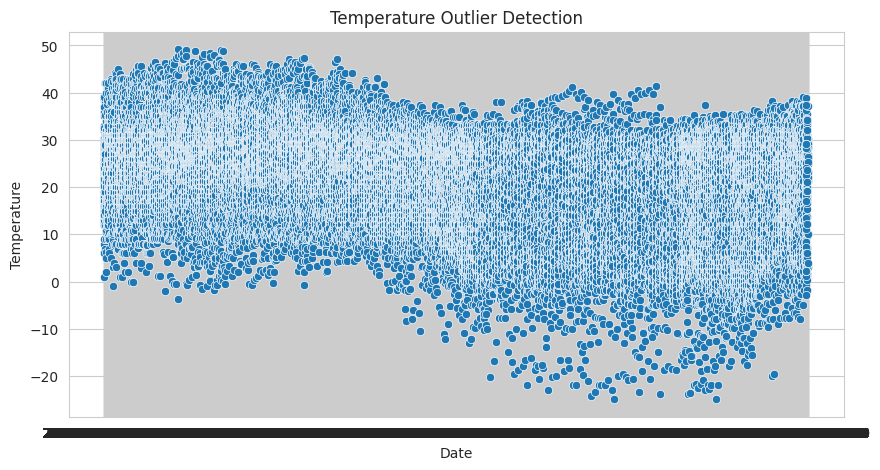

In [ ]:

plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='last_updated', y='temperature_celsius', palette={1:'blue', -1:'red'})
plt.title('Temperature Outlier Detection')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

Mean Absolute Error (MAE): 1.12
Root Mean Squared Error (RMSE): 1.58


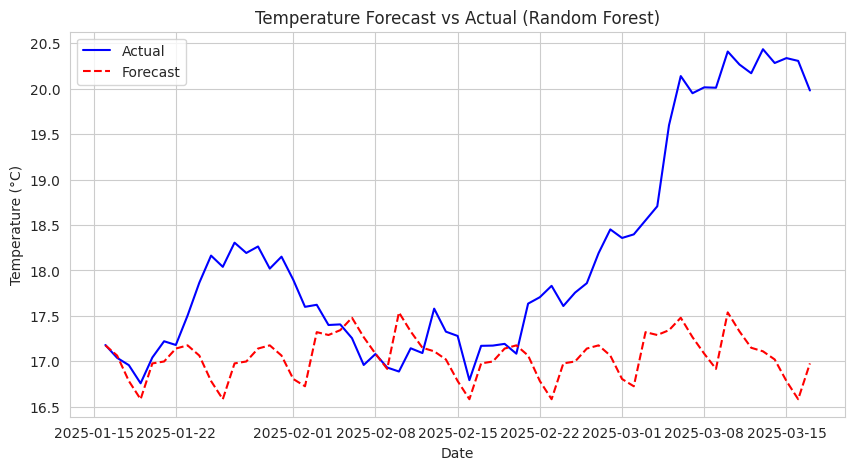

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

if "last_updated" not in df.columns:
    raise KeyError("Column 'last_updated' not found in dataset. Check the column names.")

df["last_updated"] = pd.to_datetime(df["last_updated"], errors="coerce")
df = df.dropna(subset=["last_updated"])
non_numeric_cols = df.select_dtypes(exclude=["number"]).columns.tolist()
non_numeric_cols.remove("last_updated")  # Keep timestamp column
df_cleaned = df.drop(columns=non_numeric_cols)


df_cleaned = df_cleaned.set_index("last_updated")
df_cleaned.index = pd.to_datetime(df_cleaned.index)
df_resampled = df_cleaned.resample("D").mean().dropna()


if len(df_resampled) < 30:
    raise ValueError("Not enough data points for time series forecasting.")


df_resampled["year"] = df_resampled.index.year
df_resampled["month"] = df_resampled.index.month
df_resampled["day"] = df_resampled.index.day
df_resampled["day_of_week"] = df_resampled.index.dayofweek

# Train-test split (80% train, 20% test)
split_idx = int(len(df_resampled) * 0.8)
train, test = df_resampled[:split_idx], df_resampled[split_idx:]

features = ["year", "month", "day", "day_of_week"]
target = "temperature_celsius"

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(train[features], train[target])
forecast = rf_model.predict(test[features])

mae = mean_absolute_error(test[target], forecast)
rmse = np.sqrt(mean_squared_error(test[target], forecast))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot actual vs forecast
plt.figure(figsize=(10, 5))
plt.plot(test.index, test[target], label="Actual", color="blue")
plt.plot(test.index, forecast, label="Forecast", color="red", linestyle="dashed")
plt.title("Temperature Forecast vs Actual (Random Forest)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

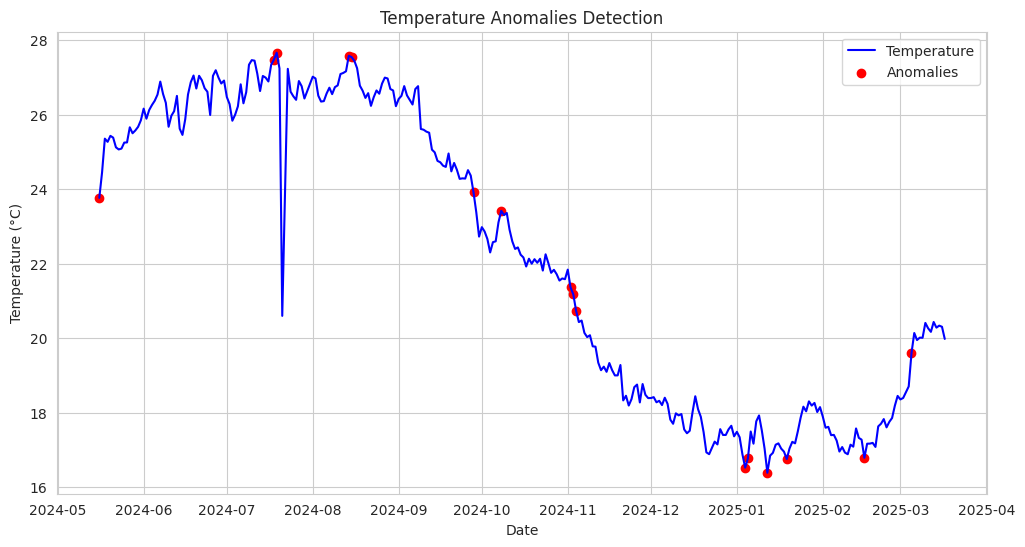

In [ ]:
from sklearn.ensemble import IsolationForest
# Anomaly Detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_resampled["anomaly"] = iso_forest.fit_predict(df_resampled[["temperature_celsius"]])
anomalies = df_resampled[df_resampled["anomaly"] == -1]
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled["temperature_celsius"], label="Temperature", color="blue")
plt.scatter(anomalies.index, anomalies["temperature_celsius"], color="red", label="Anomalies", marker="o")
plt.title("Temperature Anomalies Detection")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Linear Regression -> MAE: 2.80, RMSE: 3.35
ARIMA -> MAE: 1.16, RMSE: 1.62


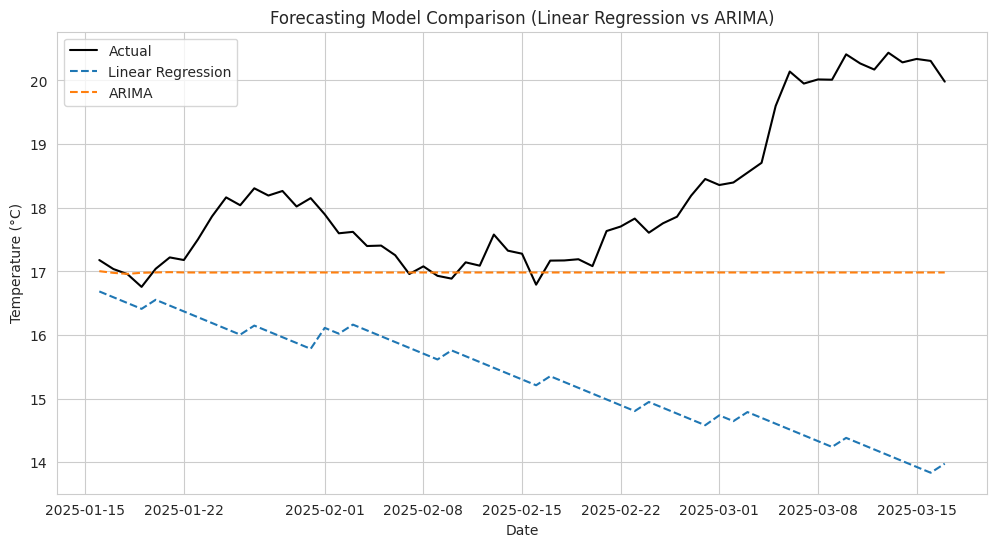

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression

# Prepare features and target
X_train, X_test = train[features], test[features]
y_train, y_test = train[target], test[target]

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# ARIMA Model (Using Auto ARIMA Order Selection)
arima_order = (5, 1, 0)  # (p, d, q) values can be optimized
arima_model = ARIMA(train[target], order=arima_order)
arima_model = arima_model.fit()
arima_preds = arima_model.forecast(steps=len(test))

models = {"Linear Regression": lr_preds, "ARIMA": arima_preds}
for model, preds in models.items():
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"{model} -> MAE: {mae:.2f}, RMSE: {rmse:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label="Actual", color="black")
for model, preds in models.items():
    plt.plot(test.index, preds, label=model, linestyle="dashed")
plt.title("Forecasting Model Comparison (Linear Regression vs ARIMA)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


XGBoost -> MAE: 1.11, RMSE: 1.59


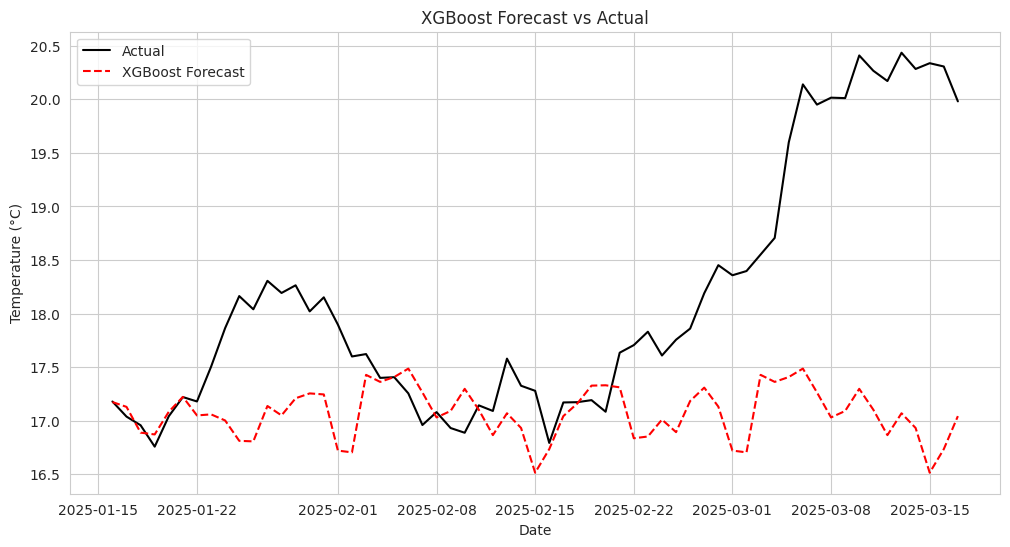

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Prepare features and target
X_train, X_test = train[features], test[features]
y_train, y_test = train[target], test[target]

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_preds = xgb_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, xgb_preds)
rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))

print(f"XGBoost -> MAE: {mae:.2f}, RMSE: {rmse:.2f}")
# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label="Actual", color="black")
plt.plot(test.index, xgb_preds, label="XGBoost Forecast", linestyle="dashed", color="red")
plt.title("XGBoost Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


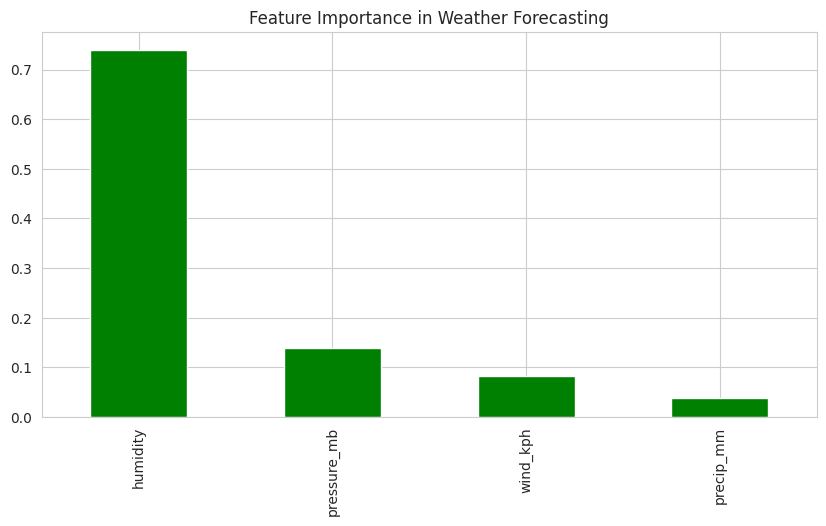

In [ ]:
from xgboost import XGBRegressor
import pandas as pd

# Define features and target
features = ["humidity", "wind_kph", "pressure_mb", "precip_mm"]
target = "temperature_celsius"

# Split data
X_train, X_test = train[features], test[features]
y_train, y_test = train[target], test[target]

# Train XGBoost model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Feature Importance Plot
feature_importance = pd.Series(xgb.feature_importances_, index=features)
feature_importance.sort_values(ascending=False).plot(kind="bar", figsize=(10, 5), color="green")
plt.title("Feature Importance in Weather Forecasting")
plt.show()
